https://bkshin.tistory.com/entry/OpenCV-12-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%9C%A0%EC%82%AC%EB%8F%84-%EB%B9%84%EA%B5%90-%EC%82%AC%EB%9E%8C-%EC%96%BC%EA%B5%B4%EA%B3%BC-%ED%95%B4%EA%B3%A8-%ED%95%A9%EC%84%B1-%EB%AA%A8%EC%85%98-%EA%B0%90%EC%A7%80-CCTV

### cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
-> 이미지 히스토그램을 찾아서 numpy 배열로 리턴

- Parameters:</br>
    • image – 분석대상 이미지(uint8 or float32 type). Array형태.</br>
    • channels – 분석 채널(X축의 대상). 이미지가 graysacle이면 [0], color 이미지이면 [0],[0,1] 형태(1 : Blue, 2: Green, 3: Red)</br>
    • mask – 이미지의 분석영역. None이면 전체 영역.
    • histSize – BINS 값, 인자는 []로 둘러싸야 함. [256]</br>
    • ranges – 픽셀값 범위, Range값. 보통 [0,256]</br>

In [31]:
import cv2
import numpy as np
import matplotlib.pylab as plt

In [20]:
v1=cv2.imread('/data/img/V1.png')
v2=cv2.imread('/data/img/V2.png')
v3=cv2.imread('/data/img/V3.png')
v4=cv2.imread('/data/img/V4.png')

In [21]:
cv2.imshow('query', v1)

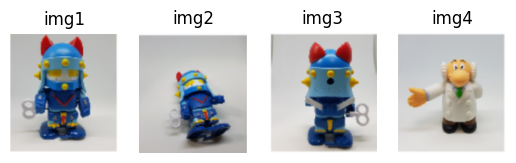

In [22]:
imgs=[v1, v2, v3, v4]
hists=[]

for i, img in enumerate(imgs):
    plt.subplot(1, len(imgs), i+1)
    # plt.title('img%d' %(i+1))
    plt.title(f'img{i+1}')
    plt.axis('off')
    plt.imshow(img[:, :, ::-1])
    
    #---① 각 이미지를 HSV로 변환
    hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    #---② H,S 채널에 대한 히스토그램 계산
    hist=cv2.calcHist([hsv], [0,1], None, [180, 256],
                     [0, 180, 0, 256])
    
    #---③ 0~1로 정규화
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)

In [23]:
query=hists[0]

In [24]:
methods={'CORREL': cv2.HISTCMP_CORREL,
        'CHISQR': cv2.HISTCMP_CHISQR,
        'INTERSECT' : cv2.HISTCMP_INTERSECT,
        'BHATTACHARYYA' : cv2.HISTCMP_BHATTACHARYYA}

In [25]:
for j, (name, flag) in enumerate(methods.items()):
    print('%-10s'%name, end='\t')
    
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        
        #---④ 각 메서드에 따라 img1과 각 이미지의 히스토그램 비교
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT: #교차 분석인 경우 
            ret = ret/np.sum(query)        #비교대상으로 나누어 1로 정규화
        print("img%d:%7.2f"% (i+1 , ret), end='\t')
    print()

CORREL    	img1:   1.00	img2:   0.70	img3:   0.52	img4:   0.24	
CHISQR    	img1:   0.00	img2: 135.38	img3:  18.62	img4:2307.11	
INTERSECT 	img1:   1.00	img2:   0.50	img3:   0.30	img4:   0.19	
BHATTACHARYYA	img1:   0.00	img2:   0.56	img3:   0.56	img4:   0.79	


In [26]:
plt.show()

CORREL    	img1:   1.00	img2:   0.70	img3:   0.52	img4:   0.24	
CHISQR    	img1:   0.00	img2: 135.38	img3:  18.62	img4:2307.11	
INTERSECT 	img1:   1.00	img2:   0.50	img3:   0.30	img4:   0.19	
BHATTACHARYYA	img1:   0.00	img2:   0.56	img3:   0.56	img4:   0.79	


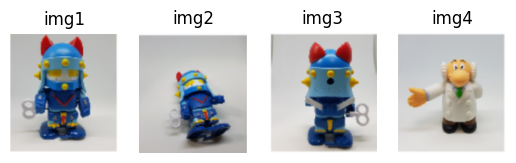

In [30]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img1 = cv2.imread('/data/img/V1.png')
img2 = cv2.imread('/data/img/V2.png')
img3 = cv2.imread('/data/img/V3.png')
img4 = cv2.imread('/data/img/V4.png')

cv2.imshow('query', img1)
imgs = [img1, img2, img3, img4]
hists = []
for i, img in enumerate(imgs) :
    plt.subplot(1,len(imgs),i+1)
    plt.title('img%d'% (i+1))
    plt.axis('off') 
    plt.imshow(img[:,:,::-1])
    #---① 각 이미지를 HSV로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #---② H,S 채널에 대한 히스토그램 계산
    hist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0, 256])
    #---③ 0~1로 정규화
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)


query = hists[0]
methods = {'CORREL' :cv2.HISTCMP_CORREL, 'CHISQR':cv2.HISTCMP_CHISQR, 
           'INTERSECT':cv2.HISTCMP_INTERSECT,
           'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}
for j, (name, flag) in enumerate(methods.items()):
    print('%-10s'%name, end='\t')
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        #---④ 각 메서드에 따라 img1과 각 이미지의 히스토그램 비교
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT: #교차 분석인 경우 
            ret = ret/np.sum(query)        #비교대상으로 나누어 1로 정규화
        print("img%d:%7.2f"% (i+1 , ret), end='\t')
    print()
plt.show()